In [19]:
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2


In [20]:
name = '000378'
img = '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '.png'
binary = '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '.bin'
txt = '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '.txt'
label_txt = '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '_label.txt'
with open(txt,'r') as f:
    calib = f.readlines()

In [21]:
# P2 (3 x 4) for left eye
P2 = np.matrix([float(x) for x in calib[2].strip('\n').split(' ')[1:]]).reshape(3,4)
R0_rect = np.matrix([float(x) for x in calib[4].strip('\n').split(' ')[1:]]).reshape(3,3)
# Add a 1 in bottom-right, reshape to 4 x 4
R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
Tr_velo_to_cam = np.matrix([float(x) for x in calib[5].strip('\n').split(' ')[1:]]).reshape(3,4)
Tr_velo_to_cam = np.insert(Tr_velo_to_cam,3,values=[0,0,0,1],axis=0)

In [22]:
P2 = np.matrix([float(x) for x in calib[2].strip('\n').split(' ')[1:]]).reshape(3,4)
# P2 = np.insert(P2,3,1,axis=0)
P2

matrix([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
        [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])

In [23]:
R0_rect = np.matrix([float(x) for x in calib[4].strip('\n').split(' ')[1:]]).reshape(3,3)
# Add a 1 in bottom-right, reshape to 4 x 4
R0_rect = np.insert(R0_rect,3,values=[0,0,0],axis=0)
R0_rect = np.insert(R0_rect,3,values=[0,0,0,1],axis=1)
R0_rect

matrix([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
        [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
        [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [24]:
Tr_velo_to_cam = np.matrix([float(x) for x in calib[5].strip('\n').split(' ')[1:]]).reshape(3,4)
Tr_velo_to_cam = np.insert(Tr_velo_to_cam,3,values=[0,0,0,1],axis=0)
Tr_velo_to_cam 

matrix([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
        [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
        [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [25]:
# read raw data from binary
scan = np.fromfile(binary, dtype=np.float32).reshape((-1,4))
points = scan[:, 0:3] # lidar xyz (front, left, up)
points

array([[ 4.6522e+01,  1.8000e-02,  1.7820e+00],
       [ 4.6545e+01,  1.6400e-01,  1.7830e+00],
       [ 4.6637e+01,  3.1100e-01,  1.7860e+00],
       ...,
       [ 3.6770e+00, -1.3900e+00, -1.7170e+00],
       [ 3.7050e+00, -1.3880e+00, -1.7290e+00],
       [ 3.7010e+00, -1.3730e+00, -1.7250e+00]], dtype=float32)

In [26]:
velo = np.insert(points,3,1,axis=1).T
velo

array([[ 4.6522e+01,  4.6545e+01,  4.6637e+01, ...,  3.6770e+00,
         3.7050e+00,  3.7010e+00],
       [ 1.8000e-02,  1.6400e-01,  3.1100e-01, ..., -1.3900e+00,
        -1.3880e+00, -1.3730e+00],
       [ 1.7820e+00,  1.7830e+00,  1.7860e+00, ..., -1.7170e+00,
        -1.7290e+00, -1.7250e+00],
       [ 1.0000e+00,  1.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         1.0000e+00,  1.0000e+00]], dtype=float32)

In [27]:
_,s = velo.shape
index  = np.arange(0,s).reshape(1,s)
index.shape

(1, 123060)

In [28]:

velo1 = np.delete(velo,np.where(velo[0,:]<0),axis=1)
index1 = np.delete(index,np.where(velo[0,:]<0),axis=1)

In [29]:
index1

array([[     0,      1,      2, ..., 123057, 123058, 123059]])

In [30]:
test = velo.T
np.savetxt('/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/test_full.txt',test,fmt="%.8f")

In [31]:
cam = P2 * R0_rect * Tr_velo_to_cam * velo1
cam1 = np.delete(cam,np.where(cam[2,:]<0)[1],axis=1)
cam1

matrix([[2.82259923e+04, 2.81346858e+04, 2.80847268e+04, ...,
         3.12373266e+03, 3.13937625e+03, 3.12611118e+03],
        [7.00853574e+03, 7.01308082e+03, 7.02864150e+03, ...,
         1.78727135e+03, 1.80097316e+03, 1.79748774e+03],
        [4.62686983e+01, 4.62917244e+01, 4.63837719e+01, ...,
         3.38929457e+00, 3.41716775e+00, 3.41321169e+00]])

In [32]:
index_cam1 = np.delete(index1,np.where(cam[2,:]<0)[1],axis=1)
index_cam1.shape

(1, 62195)

In [33]:
index_cam1

array([[     0,      1,      2, ..., 123057, 123058, 123059]])

In [34]:
# get u,v,z
cam1[:2] /= cam1[2,:]  # cam[:2] = cam[:2] /cam[2:]  uv = xy / z 
cam1

matrix([[610.04509206, 607.76923091, 605.48604839, ..., 921.64684901,
         918.70709191, 915.88552401],
        [151.47466869, 151.4975064 , 151.53234005, ..., 527.32841863,
         527.03680175, 526.62650334],
        [ 46.26869827,  46.29172444,  46.38377192, ...,   3.38929457,
           3.41716775,   3.41321169]])

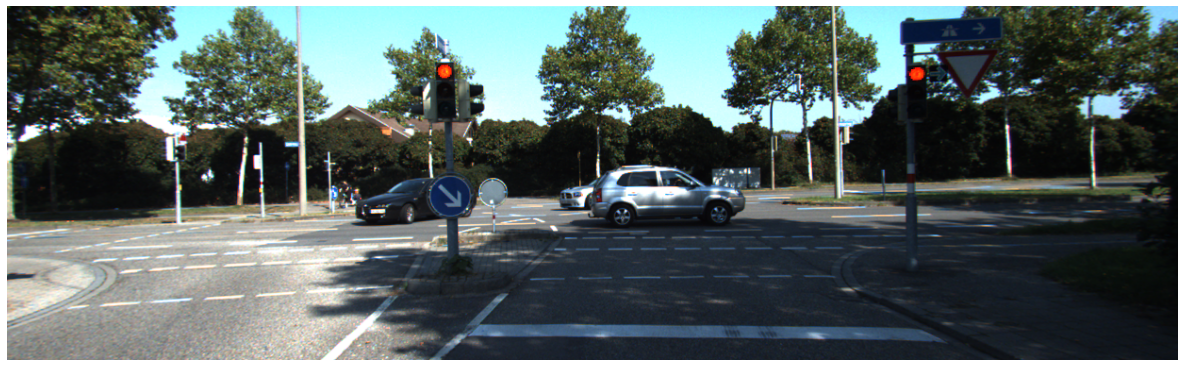

In [35]:
# do projection staff

plt.figure(figsize=(1242/72,375/72),dpi = 72, tight_layout=True)
png = mpimg.imread(img)
# png = cv2.imread(img)
# png = png[:,:,::-1]

IMG_H,IMG_W,_ = png.shape
# # restrict canvas in range
plt.axis('off')


plt.imshow(png)

In [36]:
# filter point out of canvas
u,v,z = cam1
u_out = np.logical_or(u<0, u>IMG_W)
v_out = np.logical_or(v<0, v>IMG_H)
outlier = np.logical_or(u_out, v_out)
cam2 = np.delete(cam1,np.where(outlier),axis=1)
cam2.shape

(3, 20556)

In [37]:
index_cam2 = np.delete(index_cam1,np.where(outlier),axis=1)
index_cam2

array([[    1,     2,     3, ..., 93037, 93038, 93039]])

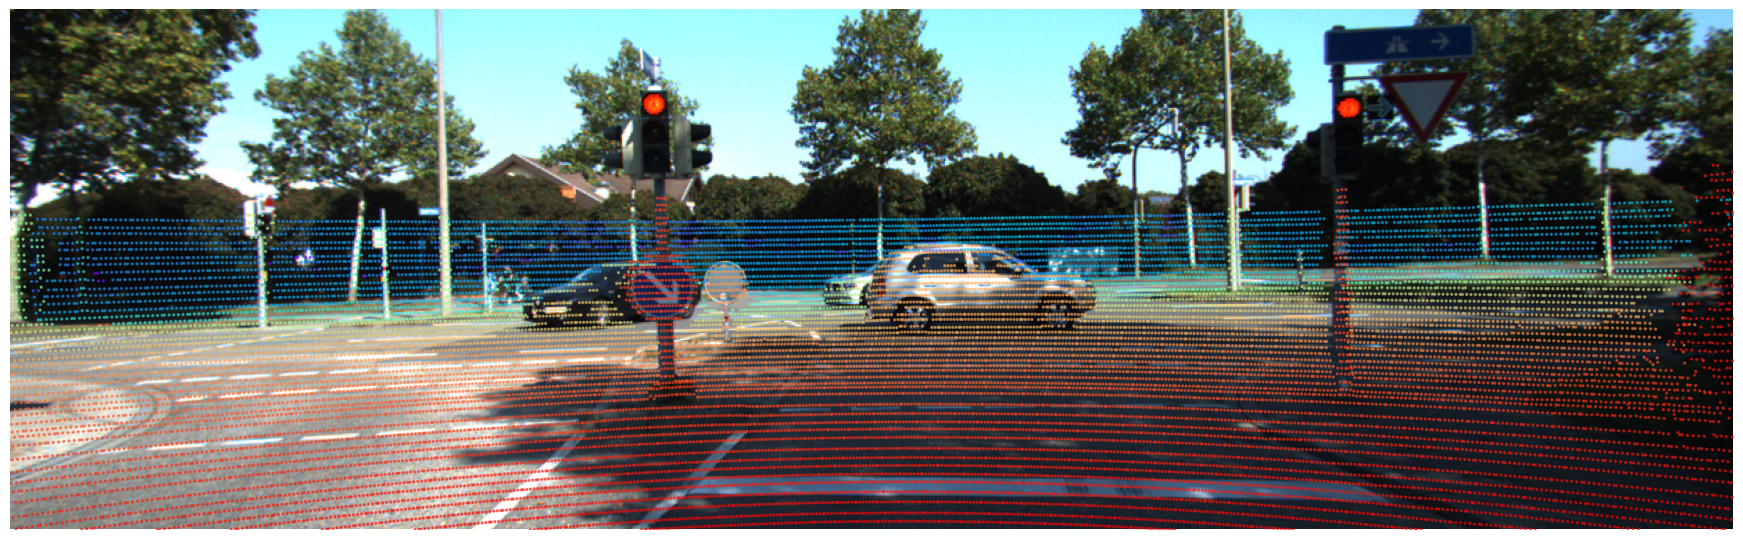

In [38]:
# generate color map from depth 
u,v,z = cam2

# plt.figure(figsize=(1242/72,375/72),dpi = 72, tight_layout=True)
plt.scatter([u],[v],c=[z],cmap='rainbow_r',alpha=0.5,s=2)
plt.axis('off')
# # plt.axis([0,IMG_W,IMG_H,0])

plt.imshow(png)

fig = plt.gcf()
fig.set_size_inches(1242/72,375/72)

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)

plt.savefig('/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '_withpc.png', format='png', transparent=True, dpi=72, pad_inches = 0)

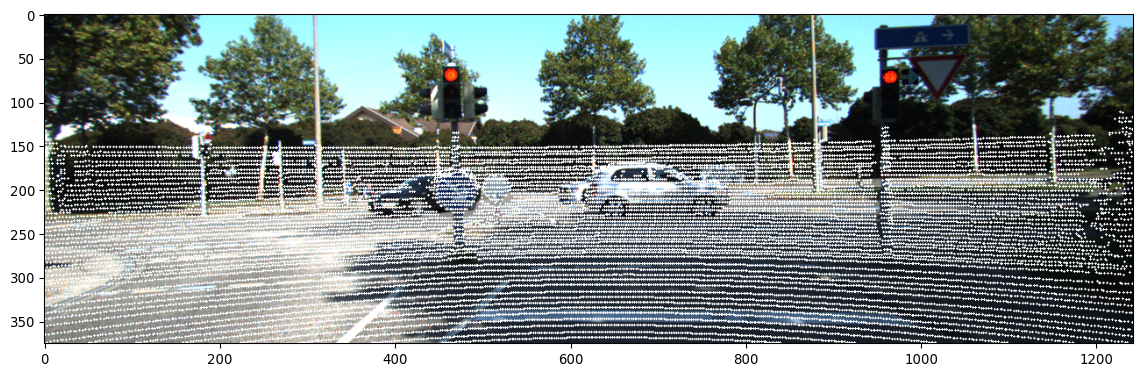

In [39]:
u, v, z = cam2
_, a = u.shape
x = []
y = []
jpg = cv2.imread(img)

for i in range(0, a):
    x_2d = int(u[0, i])
    y_2d = int(v[0, i])
    x.append(x_2d)
    # y.append(y_2d)
    cv2.circle(jpg,(x_2d,y_2d),1,(255,255,255),-1)

# x = np.array(x)
# y = np.array(y)

# print(type(x_2d))

jpg2 = jpg[:,:,::-1]
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
plt.imshow(jpg2)


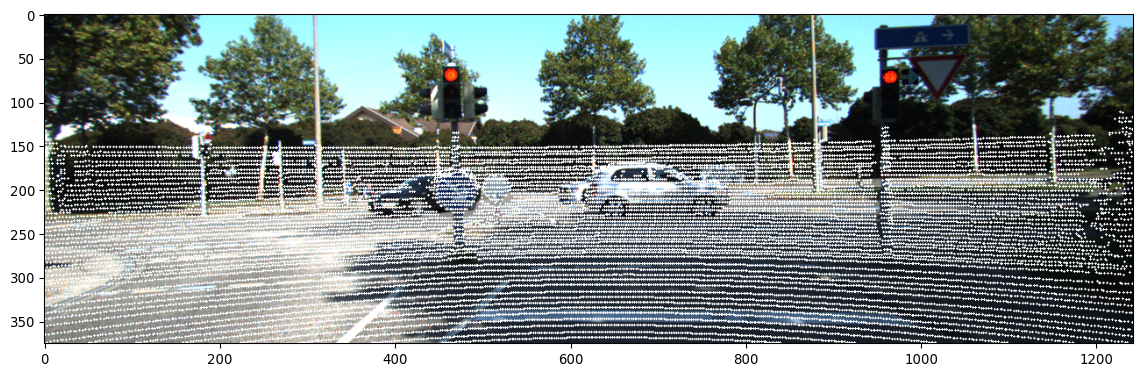

In [ ]:
u, v, z = cam2
_, a = u.shape
x = []
y = []
jpg = cv2.imread(img)

for i in range(0, a):
    x_2d = int(u[0, i])
    y_2d = int(v[0, i])
    x.append(x_2d)
    # y.append(y_2d)
    cv2.circle(jpg,(x_2d,y_2d),1,(255,255,255),-1)

# x = np.array(x)
# y = np.array(y)

# print(type(x_2d))

jpg2 = jpg[:,:,::-1]
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
plt.imshow(jpg2)


In [40]:
label = pd.read_csv(label_txt,header=None,sep=' ')
label

0         1         2         3         4
0  38  0.376006  0.534667  0.033816  0.114667
1  13  0.812802  0.194667  0.039453  0.154667

445
985


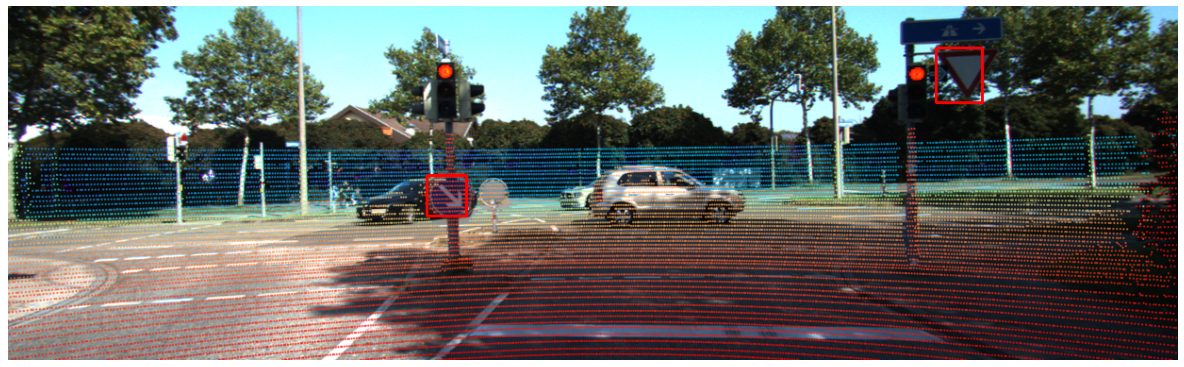

In [41]:
img_c = cv2.imread(
    '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/' + name + '_withpc.png')

for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2)
    box_ly = int(label[2][i]*375-label[4][i]*375/2)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2)
    box_ry = int(label[2][i]*375+label[4][i]*375/2)
    print(box_lx)
    cv2.rectangle(img_c, (box_lx, box_ly), (box_rx, box_ry), (0, 0, 255), 2)


jpg2 = img_c[:, :, ::-1]
plt.figure(figsize=(1242/72, 375/72), dpi=72, tight_layout=True)
plt.axis('off')
# plt.axis('off')
plt.imshow(jpg2)


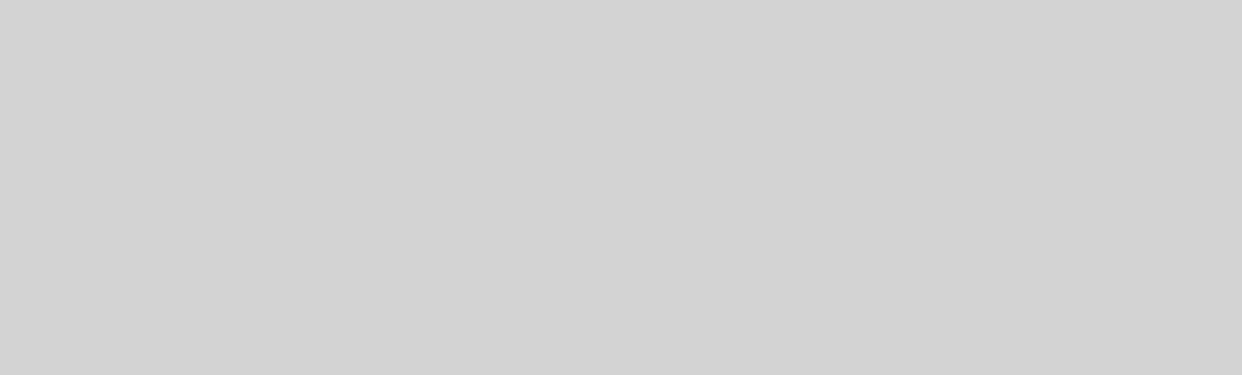

In [749]:
from PIL import Image
b_y, b_x, _ = jpg.shape
bg = Image.new("RGB",(b_x, b_y),(211,211,211))

bg

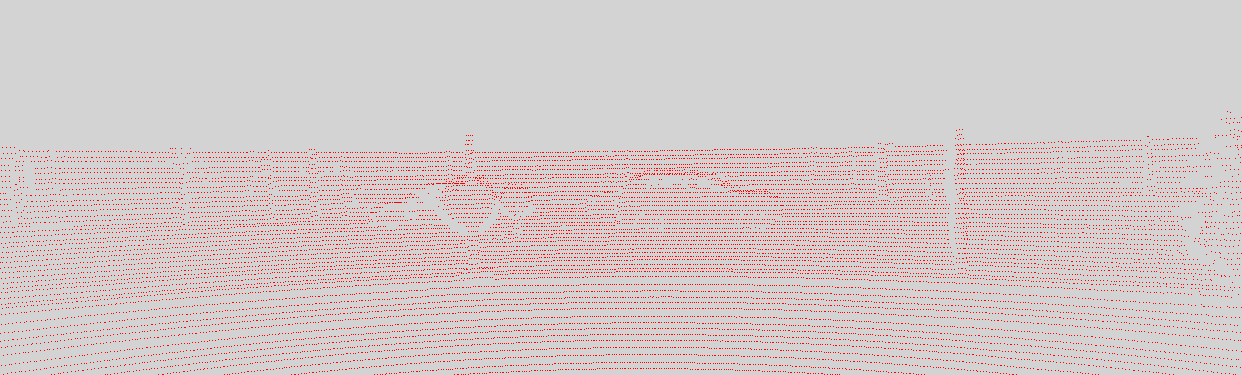

In [750]:
from PIL import ImageDraw
points = Image.new("RGB",(b_x, b_y),(211,211,211))
point = ImageDraw.ImageDraw(points)
_, i = u.shape

for i in range(0, i):
    x_2d = int(u[0, i])
    y_2d = int(v[0, i])
    point.point( (x_2d, y_2d), (255, 0, 0))

points


445
985


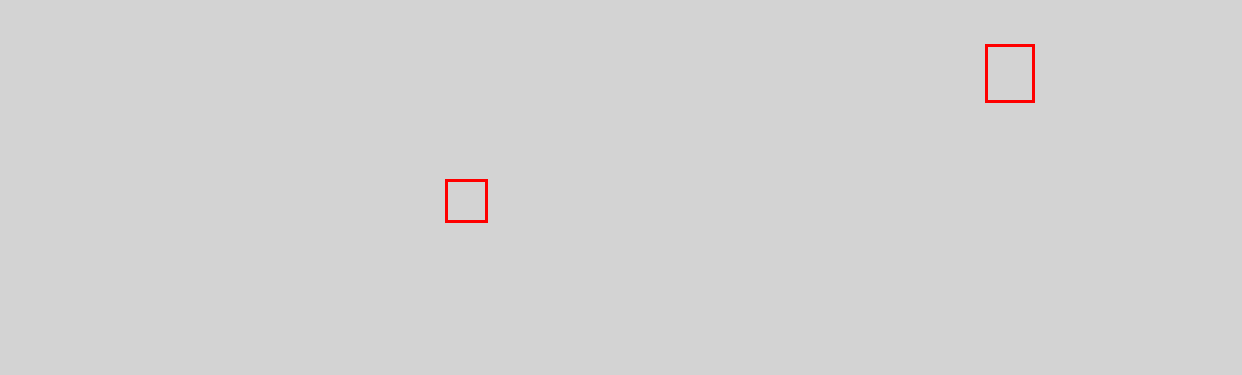

In [751]:
boxs = Image.new("RGB",(b_x, b_y),(211,211,211))
box = ImageDraw.ImageDraw(boxs)
for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2)
    box_ly = int(label[2][i]*375-label[4][i]*375/2)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2)
    box_ry = int(label[2][i]*375+label[4][i]*375/2)
    print(box_lx)
    box.rectangle(((box_lx, box_ly), (box_rx, box_ry)),fill=None,outline=(255,0,0),width=3)

boxs

In [752]:
index_cam2[0,1]

2

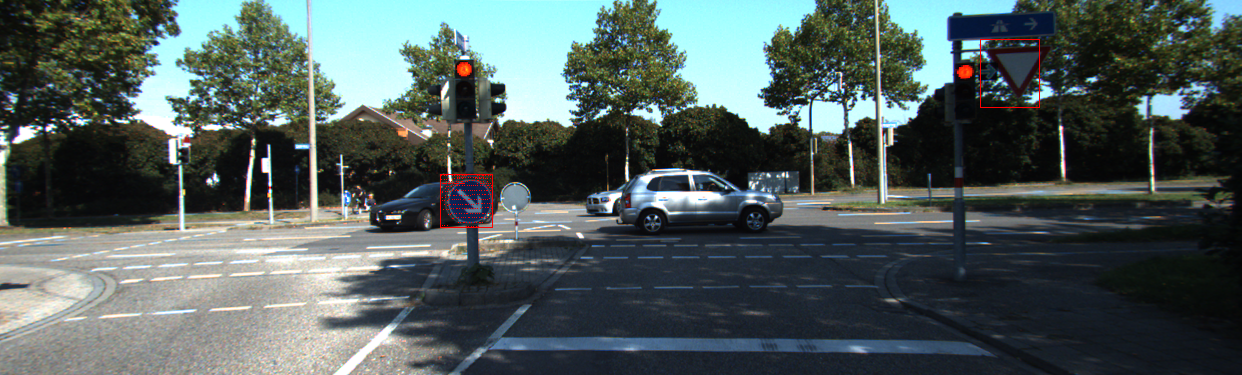

In [753]:
points_inbox = Image.open(img)
pinb = ImageDraw.ImageDraw(points_inbox)

enlarge = 5

_, j = u.shape
u_2d = []
v_2d = []
z_2d = []
index_inbox = []

for i in range(len(label[0])):
    box_lx = int(label[1][i]*1242-label[3][i]*1242/2 - enlarge)
    box_ly = int(label[2][i]*375-label[4][i]*375/2-enlarge)
    box_rx = int(label[1][i]*1242+label[3][i]*1242/2+enlarge)
    box_ry = int(label[2][i]*375+label[4][i]*375/2+enlarge)
    pinb.rectangle(((box_lx, box_ly), (box_rx, box_ry)),
                   fill=None, outline=(255, 0, 0), width=1)

    for j in range(0, j):
        if box_lx < int(u[0, j]) < box_rx and box_ly < int(v[0, j]) < box_ry:
            xinb_2d = (u[0, j])
            yinb_2d = (v[0, j])
            zinb_2d = (z[0, j])
            u_2d.append(xinb_2d)
            v_2d.append(yinb_2d)
            z_2d.append(zinb_2d)
            index_inbox.append(index_cam2[0, j])
            pinb.point((int(xinb_2d), int(yinb_2d)), (255, 0, 0))

points_inbox


In [754]:
index_inbox

[9130,
 9131,
 9132,
 9133,
 9134,
 9135,
 9136,
 9140,
 9142,
 9143,
 9144,
 9145,
 9146,
 9147,
 9150,
 9151,
 9152,
 11000,
 11001,
 11002,
 11003,
 11004,
 11005,
 11006,
 11007,
 11012,
 11013,
 11014,
 11015,
 11016,
 11017,
 11018,
 11019,
 11020,
 12846,
 12847,
 12848,
 12849,
 12850,
 12851,
 12852,
 12856,
 12857,
 12858,
 12859,
 12860,
 12861,
 12862,
 12863,
 12864,
 12865,
 12866,
 14713,
 14714,
 14715,
 14720,
 14721,
 14722,
 14723,
 14724,
 14725,
 14726,
 14727,
 16550,
 16551,
 16552,
 16553,
 16554,
 16555,
 16556,
 16557,
 16558,
 16559,
 16560,
 16561,
 16562,
 16563,
 16564,
 16565,
 16566,
 18410,
 18411,
 18412,
 18413,
 18414,
 18415,
 18416,
 18417,
 18418,
 18419,
 18420,
 18421,
 18422,
 18423,
 18424,
 18425,
 18426,
 18427,
 18428,
 20326,
 20327,
 20328,
 20329,
 20330,
 20331,
 20332,
 20333,
 20334,
 20335,
 20336,
 20337,
 20338,
 20339,
 20340,
 20341,
 20342,
 20343,
 20344,
 20345,
 20346,
 20347,
 20348,
 22290,
 22291,
 22292,
 22293,
 22294,
 

In [770]:
scan.shape

(123060, 4)

In [769]:
intensity = scan[:, 3:4].T
intensity

array([[0.14, 0.  , 0.  , ..., 0.25, 0.16, 0.  ]], dtype=float32)

In [771]:
x = []
y = []
z = []
inten = []

for i in index_inbox:
    x_t = velo[0,int(i)]
    y_t = velo[1,int(i)]
    z_t = velo[2,int(i)]
    i_t = intensity[0,int(i)]
    x.append(x_t)
    y.append(y_t)
    z.append(z_t)
    inten.append(i_t)
    
x = np.array(x)
y = np.array(y)
z = np.array(z)
inten = np.array(inten)


np.savetxt('/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/378/test.txt',np.vstack([x,y,z,inten]).T,fmt="%.8f")

In [778]:
import open3d as o3d
target_points = np.vstack([x,y,z,inten])


: 

In [ ]:
np.delete(target_points,np.where(target_points[0,:]<0),axis=1)